In [ ]:
#Randomforest
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
data = pd.read_csv("/content/crop_yield_data.csv")

# Feature Selection
features = ["soil_quality", "rainfall", "temperature"]
target = "crop_yield"

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE first and then take the square root to get RMSE
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = mse**0.5  # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R^2: {r2}")

MAE: 0.43493399999999993, RMSE: 0.5251253593190865, R^2: 0.6758999207178631


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


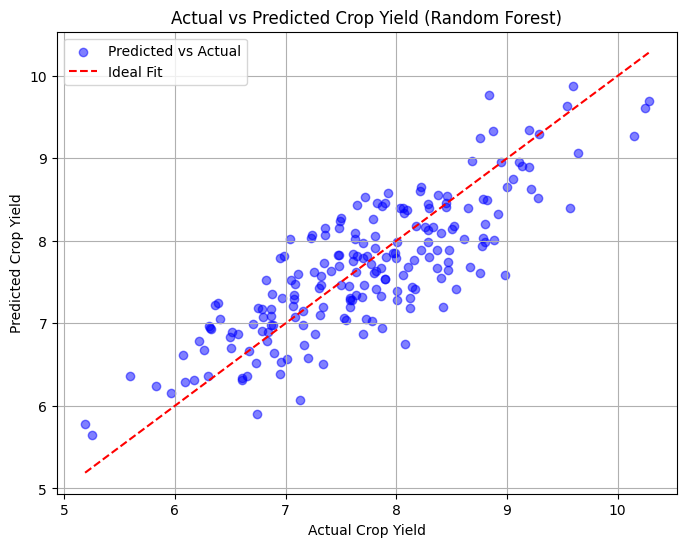

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted crop yield values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Ideal Fit")

plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


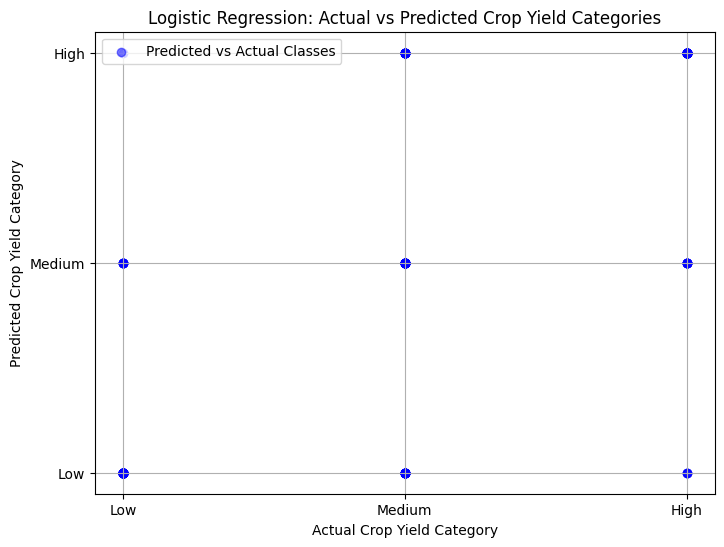

(0.69,
 '              precision    recall  f1-score   support\n\n           0       0.71      0.85      0.77        68\n           1       0.64      0.46      0.53        70\n           2       0.71      0.77      0.74        62\n\n    accuracy                           0.69       200\n   macro avg       0.68      0.69      0.68       200\nweighted avg       0.68      0.69      0.68       200\n')

In [ ]:
#Logistic Regression
# Re-import necessary libraries since execution state was reset again
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic dataset again (1000 samples)
num_samples = 1000

soil_quality = np.round(np.random.uniform(5.5, 8.5, num_samples), 1)  # Soil pH levels
rainfall = np.random.randint(600, 1200, num_samples)  # Rainfall in mm
temperature = np.random.randint(15, 35, num_samples)  # Temperature in Celsius

# Generate crop yield and categorize into classes
crop_yield = np.round((soil_quality * 0.5 + rainfall * 0.002 + temperature * 0.1 + np.random.normal(0, 0.5, num_samples)), 2)
yield_category = pd.qcut(crop_yield, q=3, labels=[0, 1, 2])  # Categorizing into Low (0), Medium (1), High (2)

# Create DataFrame
df = pd.DataFrame({
    "soil_quality": soil_quality,
    "rainfall": rainfall,
    "temperature": temperature,
    "crop_yield_category": yield_category
})

# Feature Selection
features = ["soil_quality", "rainfall", "temperature"]
target = "crop_yield_category"

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Model Training using Logistic Regression
model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Scatter Plot of Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual Classes")
plt.xlabel("Actual Crop Yield Category")
plt.ylabel("Predicted Crop Yield Category")
plt.title("Logistic Regression: Actual vs Predicted Crop Yield Categories")
plt.xticks([0, 1, 2], ["Low", "Medium", "High"])
plt.yticks([0, 1, 2], ["Low", "Medium", "High"])
plt.grid(True)
plt.legend()
plt.show()

# Display evaluation metrics
accuracy, report


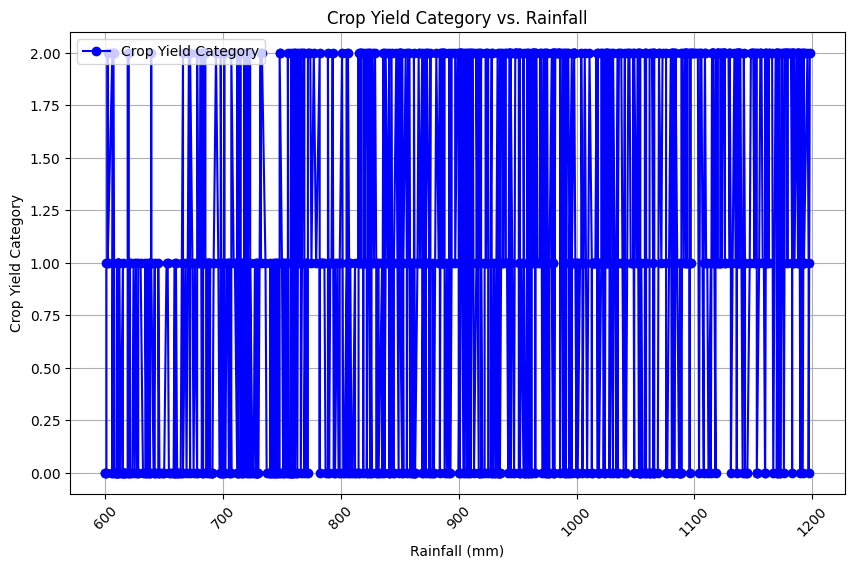

In [13]:
import matplotlib.pyplot as plt

# Sort dataset by rainfall (or any other feature) to show trends
df_sorted = df.sort_values(by="rainfall")

# Line chart for crop yield categories over rainfall
plt.figure(figsize=(10, 6))
plt.plot(df_sorted["rainfall"], df_sorted["crop_yield_category"], marker='o', linestyle='-', color='blue', label="Crop Yield Category")

plt.xlabel("Rainfall (mm)")
plt.ylabel("Crop Yield Category")
plt.title("Crop Yield Category vs. Rainfall")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


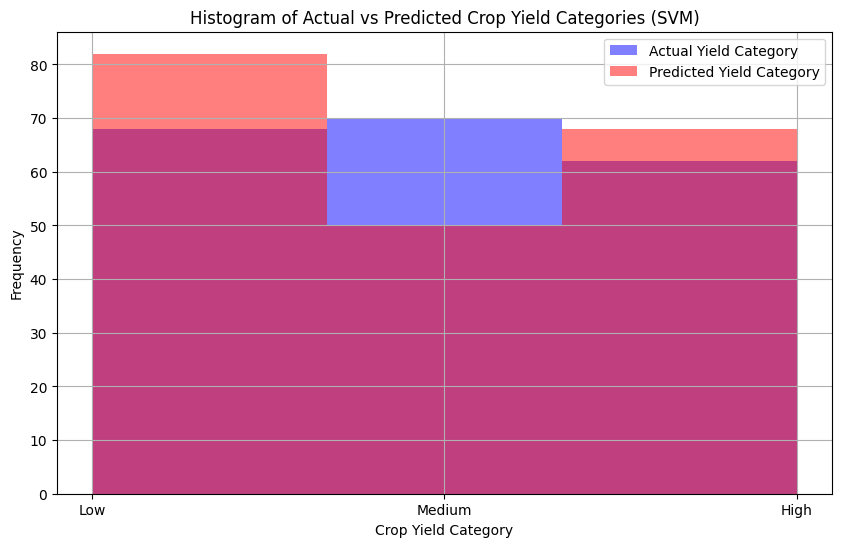

In [17]:
import matplotlib.pyplot as plt

# Histogram for actual crop yield categories
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=3, alpha=0.5, color='blue', label="Actual Yield Category")

# Histogram for predicted crop yield categories
plt.hist( y_pred, bins=3, alpha=0.5, color='red', label="Predicted Yield Category")

plt.xlabel("Crop Yield Category")
plt.ylabel("Frequency")
plt.title("Histogram of Actual vs Predicted Crop Yield Categories (SVM)")
plt.xticks([0, 1, 2], ["Low", "Medium", "High"])
plt.legend()
plt.grid(True)
plt.show()


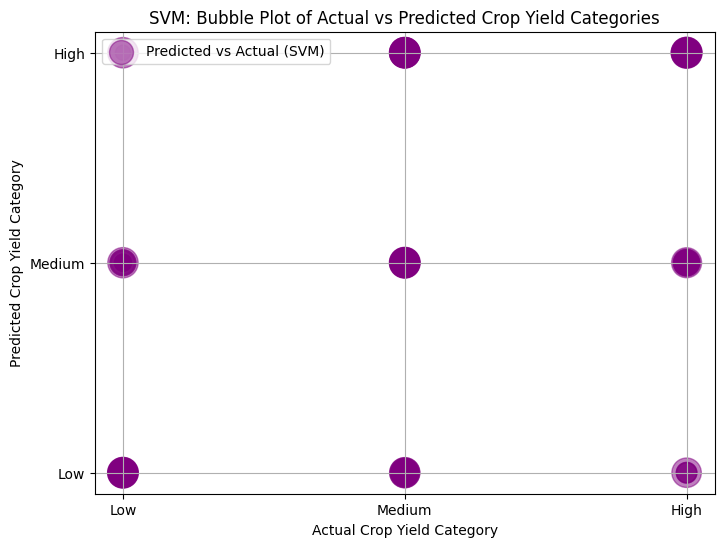

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Generate variable bubble sizes
bubble_sizes = np.random.randint(100, 500, size=len(y_test))  # Variable bubble sizes

# Bubble Plot for SVM Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=bubble_sizes, alpha=0.5, color='purple', label="Predicted vs Actual (SVM)")

plt.xlabel("Actual Crop Yield Category")
plt.ylabel("Predicted Crop Yield Category")
plt.title("SVM: Bubble Plot of Actual vs Predicted Crop Yield Categories")
plt.xticks([0, 1, 2], ["Low", "Medium", "High"])
plt.yticks([0, 1, 2], ["Low", "Medium", "High"])
plt.grid(True)
plt.legend()
plt.show()


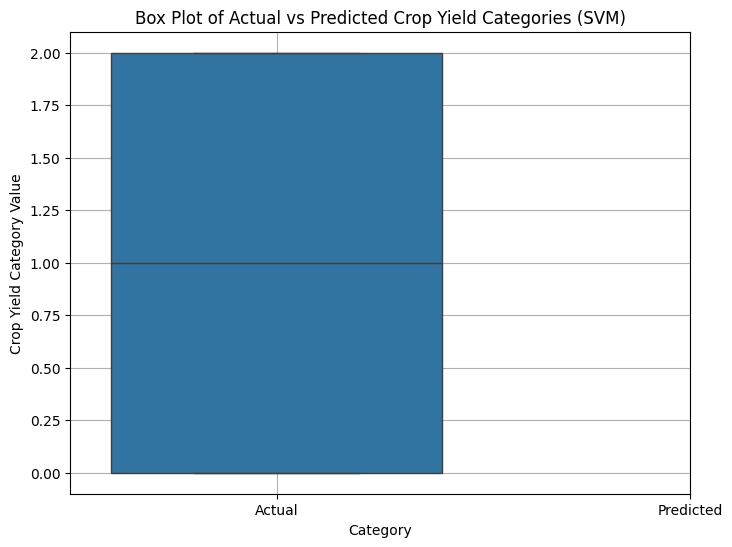

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a DataFrame for comparison
svm_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Box Plot for Actual vs. Predicted Crop Yield Categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=svm_results)

plt.xlabel("Category")
plt.ylabel("Crop Yield Category Value")
plt.title("Box Plot of Actual vs Predicted Crop Yield Categories (SVM)")
plt.xticks(ticks=[0, 1], labels=["Actual", "Predicted"])
plt.grid(True)
plt.show()
